## Proj_02 : Identify Customer Segments
- Source : UdaCity, Machine Learning Intro, Unsupervided Learning

## Introduction

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany.<br>
These segments can then be used to direct marketing campaings audiences that will have the highest expected rate of returns.<br>
The data that you will use has been provided by our partners at `Bertelsmann Arvato Analytics`, and represents a real-life data science task.

## Goal

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. <br>
I will use this information to cluster the general population into groups with similar demographic properties. 

Then, I will see how the people in the customers dataset fit into those created clusters.<br> 
The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.


<a id="mokuji_0"></a>
## Contents
1. [Exploring the Dataset](#mokuji_1)<br>
  1-1. [AZDIAS_Feature_Summary.csv](#mokuji_1_1)<br>
  1-2. [UdaCity_AZDIAS_Subset.csv](#mokuji_1_2)<br>
  1-3. [Udacity_CUSTOMERS_Subset.csv](#mokuji_1_3)<br>
  1-4. [Data_Dictionary.md](#mokuji_1_4)<br>
  <br>
2. [Preprocessing the Dataset](#mokuji_2)<br>
  2-1. [AZDIAS_Feature_Summary.csv](#mokuji_2_1)<br>
  2-2. [UdaCity_AZDIAS_Subset.csv](#mokuji_2_2)<br>
  2-3. [Udacity_CUSTOMERS_Subset.csv](#mokuji_2_3)<br>
  2-4. [Data_Dictionary.md](#mokuji_2_4)<br>
  <br>
  
  https://ksatola.github.io/projects/Identify_Customer_Segments10new_final.html

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

# show all observation-related columns/rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

<a id="mokuji_1"></a>
## [1. Exploring the Dataset](#mokuji_0)

There are four files in the directory "./Data/Proj_02"
1. AZDIAS_Features_Summary.csv
    - Summary of feature attributes for demographics data. 
    - 85 features(rows) x 4 columns.
2. UdaCity_AZDIAS_Subset.csv
    - Demographics data for the general population of Germany.
    - 891211 persons(rows) x 85 features(columns).
3. UdaCity_CUSTOMERS_Subset.csv
    - Demographics data for customers of a mail-order company.
    - 191652 persons (rows) x 85 features (columns).
4. Data_Dictionary.md
    - Detailed information file about the features in the provided datasets.

The fiture below is the relationship of data.
<img src="./Data/Proj_02/ER_01.PNG" width="450"/>

I will explore these dataset.



<a id="mokuji_1_1"></a>
### [1-1. AZDIAS_Feature_Summary.csv](#mokuji_0)

In [3]:
feat_info = pd.read_csv("./Data/Proj_02/AZDIAS_Feature_Summary.csv", sep=";")
display(feat_info.shape)
display(feat_info)

(85, 4)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [4]:
# Count Nans
feat_info.isnull().sum(axis=0)

attribute             0
information_level     0
type                  0
missing_or_unknown    0
dtype: int64

In [5]:
# Import my library
from Library.my_common_tool import display_unique_values
#
print("I show unique values")
col_names_of_string_value = ["attribute", "information_level", "type", "missing_or_unknown"]
display_unique_values(feat_info, col_names_of_string_value)

I show unique values
--------------------------
0. [attribute] : unique value num = 85
AGER_TYP, ALTERSKATEGORIE_GROB, ANREDE_KZ, CJT_GESAMTTYP, FINANZ_MINIMALIST, FINANZ_SPARER, FINANZ_VORSORGER, FINANZ_ANLEGER, FINANZ_UNAUFFAELLIGER, FINANZ_HAUSBAUER, FINANZTYP, GEBURTSJAHR, GFK_URLAUBERTYP, GREEN_AVANTGARDE, HEALTH_TYP, LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, LP_FAMILIE_FEIN, LP_FAMILIE_GROB, LP_STATUS_FEIN, LP_STATUS_GROB, NATIONALITAET_KZ, PRAEGENDE_JUGENDJAHRE, RETOURTYP_BK_S, SEMIO_SOZ, SEMIO_FAM, SEMIO_REL, SEMIO_MAT, SEMIO_VERT, SEMIO_LUST, SEMIO_ERL, SEMIO_KULT, SEMIO_RAT, SEMIO_KRIT, SEMIO_DOM, SEMIO_KAEM, SEMIO_PFLICHT, SEMIO_TRADV, SHOPPER_TYP, SOHO_KZ, TITEL_KZ, VERS_TYP, ZABEOTYP, ALTER_HH, ANZ_PERSONEN, ANZ_TITEL, HH_EINKOMMEN_SCORE, KK_KUNDENTYP, W_KEIT_KIND_HH, WOHNDAUER_2008, ANZ_HAUSHALTE_AKTIV, ANZ_HH_TITEL, GEBAEUDETYP, KONSUMNAEHE, MIN_GEBAEUDEJAHR, OST_WEST_KZ, WOHNLAGE, CAMEO_DEUG_2015, CAMEO_DEU_2015, CAMEO_INTL_2015, KBA05_ANTG1, KBA05_ANTG2, KBA05_ANTG3, K

<a id="mokuji_1_2"></a>
### [1-2. UdaCity_AZDIAS_Subset.csv](#mokuji_0)

In [6]:
azdias = pd.read_csv("./Data/Proj_02/Udacity_AZDIAS_Subset.csv", sep=";")
display(azdias.shape)
display(azdias.head(20).T)

(891221, 85)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1,0,-1,-1,-1,-1,1,-1,-1,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,3,2,3,1,3,4,1,2,2,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,2,1,1,2,1,2,2,1,2,1
CJT_GESAMTTYP,2.0,5.0,3.0,2.0,5.0,2.0,5.0,3.0,3.0,4.0,1.0,6.0,6.0,5.0,6.0,4.0,1.0,6.0,6.0,3.0
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,2,3,5,1,3,4,4,3,2,5
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,2,4,3,4,4,1,3,4,4,2
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,5,3,4,3,3,5,1,3,1,3
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,3,5,2,5,5,1,4,5,5,1
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,1,5,4,5,5,1,5,5,4,3
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,5,3,1,2,3,4,1,3,1,1


In [7]:
# Count Nans
azdias.isnull().sum(axis=0)

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

X-Axis is the ID of columns.
Y-Axis is the value of columns.


<Figure size 1152x576 with 0 Axes>

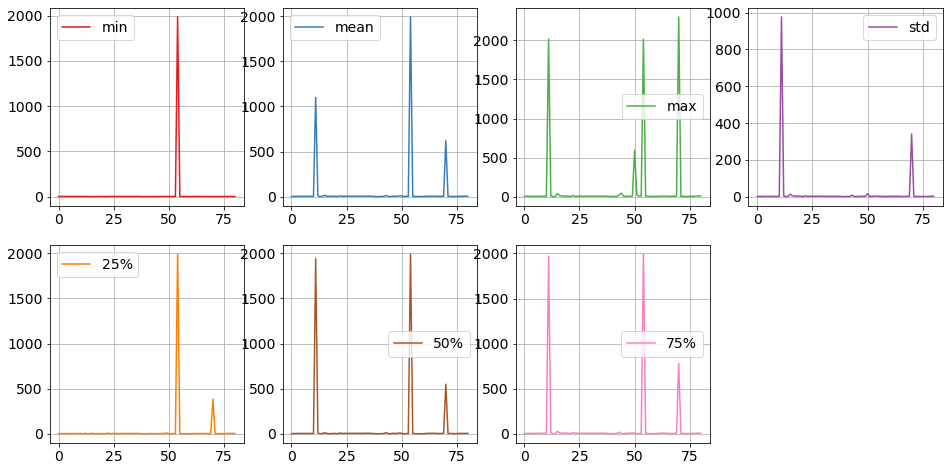

In [12]:
# Import my library
from Library.Proj_02.my_data_process import plot_summary
azdias_summary = azdias.describe().T
plot_summary(azdias_summary)

- I will display the enlarged view of the above figure. 

X-Axis is the ID of columns.
Y-Axis is the value of columns.


<Figure size 1152x576 with 0 Axes>

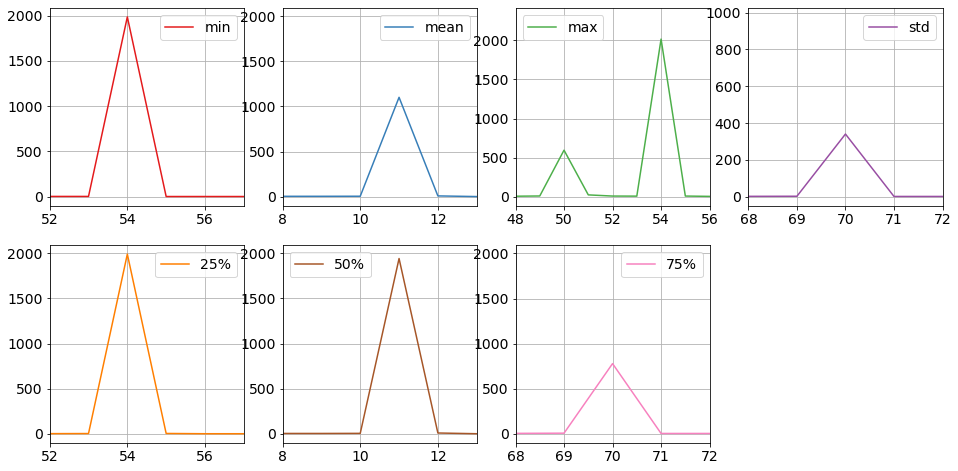

In [11]:
plot_summary(azdias_summary , xlim=[[52,57],[8,13],[48,56],[68,72],[52,57],[8,13],[68,72]])

<a id="mokuji_1_3"></a>
### [1-3. Udacity_CUSTOMERS_Subset.csv](#mokuji_0)

In [ ]:
customers = pd.read_csv("./Data/Proj_02/Udacity_CUSTOMERS_Subset.csv", sep=";")
display(customers.shape)
display(customers.head(5))

In [ ]:
# Count Nans
customers.isnull().sum(axis=0)

<a id="mokuji_1_4"></a>
### [1-4. Data_Dictionary.md](#mokuji_0)

I convert "Data_Dictionary.md" to "Data_Dictionary.csv".

In [ ]:
# Import my libarary
from Library.Proj_02.my_data_process import convert_dict_md_to_csv

# Convert .md to .csv
file_path_dict = "./Data/Proj_02/Data_Dictionary.md"
convert_dict_md_to_csv("./Data/Proj_02/Data_Dictionary.md")
#
my_dict = pd.read_csv("./Data/Proj_02/Data_Dictionary.csv", sep="\t")
display(my_dict.shape)
display(my_dict.head(5))

In [ ]:
print("I show unique values")
col_names_of_string_value = ["attribute", "explanation"]
display_unique_values(my_dict, col_names_of_string_value)

<a id="mokuji_2"></a>
## [2. Preprocessing the Dataset](#mokuji_0)